In [80]:
import joblib
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix, accuracy_score, precision_score, recall_score


print('joblib version:', joblib.__version__)
print("scikit-learn version:", sklearn.__version__)     
print('numpy version:', np.__version__)       
print("pandas version:", pd.__version__)            
print("seaborn version:", sns.__version__)          
print('matplotlib version:', plt.matplotlib.__version__)

joblib version: 1.3.2
scikit-learn version: 1.3.0
numpy version: 1.26.2
pandas version: 2.1.0
seaborn version: 0.12.2
matplotlib version: 3.7.3


# Phase 2

## Data Requirements
For predicting the quality of blackberries you need data. The ideal data set would contain the following information:

| **Feature**           | **Description**                                     | **Units**                                                       | 
|-----------------------|-----------------------------------------------------|----------------------------------------------------------------|
| Time of Picking       | Time stamp indicating when the blackberries were picked | Date and time stamp                                          |
| Worker ID             | Identification number of the worker who picked the blackberries | ID                                                      |
| Location              | Location where the blackberries were harvested | Name/Number of location                                                         |
| Fust                  | Container type used to store the blackberries         | Name Of Fust                                                         |
| Quality               | Quality rating of the harvested blackberries | Category of quality                                                            |
| Firmness              | Measurement of the firmness of the blackberries       | Rate of firmness                                                        |
| Flavor                | Evaluation of the flavor profile of the blackberries  | Rate of Flavor                                                        |
| State                 | Overall condition or state of the blackberries       | Rate of State                                                        |
| Weather Condition              | Weather conditions prevalent during picking           |   qualitative descriptors (Sunny, Rainy, etc)                                                        |
| Temperature              | Temperature of surrounding during picking           |   Celsius                                                        |
| Soil Type             | Type of soil in which the blackberry plant was cultivated | Name of the Soil                                                     |
| Plant Condition       | Indication if the blackberry was picked from a fresh plant or if it was frozen | Fresh or Frozen                                 |

## Data Collection
The data in this notebook is from a farming company that prefers anonymity. The data was collected over a period of 1 month. When the blackberries were picked, they are scanned in fusts(Crates) and the data is collected. The data is then stored in a database. The data is then extracted from the database and stored in a csv file. The data is then loaded into a pandas dataframe for analysis. 

In [81]:
df = pd.read_csv("EenhedenAug2023.csv")
df.sample(5)

,Datum,Tijd,Werknemer nr.,Locatie,Fust,Aantal fusten,Eenheden,Kwaliteit,Tarief per eenheid,Netto gewicht,Bruto gewicht
805,8/3/2023,11:37:00 AM,25,09 - Buitenteelt Naast kas Afd. 9,AH 4 x CBL-8,1,2.72,Uitstekend,NaN,2.72,5.24
6032,8/31/2023,10:45:45 AM,95,09 - Buitenteelt Naast kas Afd. 9,AH 4 x CBL-8,1,3.89,Goed,NaN,3.89,6.41
4477,8/18/2023,2:57:17 PM,79,09 - Buitenteelt Naast kas Afd. 9,AH 4 x CBL-8,1,3.85,Uitstekend,NaN,3.85,6.37
2627,8/9/2023,10:08:00 AM,56,08 - Buitenteelt achter kas Afd. 8,AH 1 x CBL-8,1,0.61,Uitstekend,NaN,0.61,1.24
5629,8/28/2023,10:50:52 AM,53,09 - Buitenteelt Naast kas Afd. 9,AH 4 x CBL-8,1,4.09,Uitstekend,NaN,4.09,6.61


## 🤔 Data understanding
Above you can see there are allot of ideal requirements fot the data. The company was not able to provide all of that data. The data that we do have are the extrernal factors on quality. 

### 📊 Data visualization (explanatory)
First i want to see how many of each quality rating we have. This will give us an idea of how the quality is distributed. 

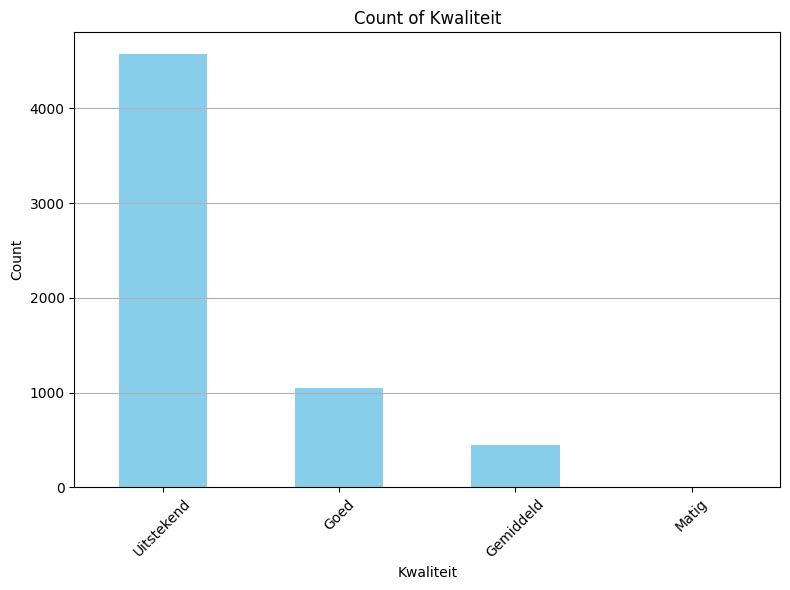

In [82]:
# Replace 'Kwaliteit' with the actual column name if different
kwaliteit_counts = df['Kwaliteit'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
kwaliteit_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Kwaliteit')
plt.xlabel('Kwaliteit')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()
plt.show()


As you can see above, the most common quality rating is 'Uitstekend'. This means perfect. After that comes Goed (Good) and then Gemiddeld (Average). The least common quality rating is Matig (Moderate). This makes sense because the company wants to sell the best quality blackberries and the pickers have to judge the quality when they pick.

Now i want to see how some employees are doing, so i will take 4 random employees and check their quality ratings.

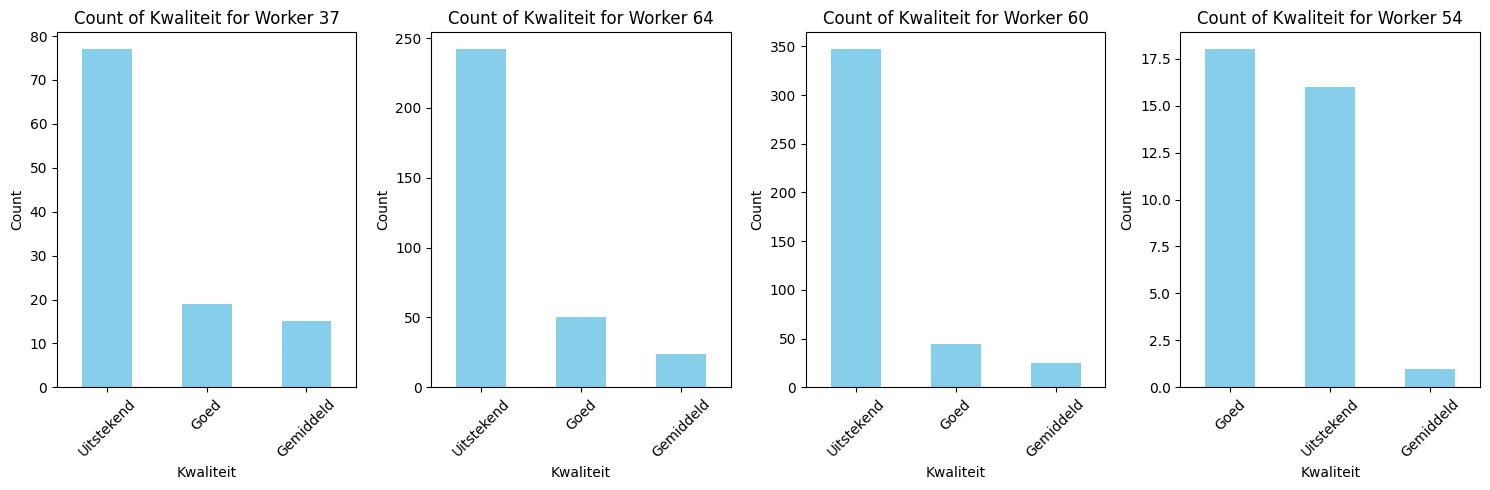

In [83]:
# Get a list of unique worker numbers from the DataFrame
unique_workers = df['Werknemer nr.'].unique()

# Define the number of subplots you want to create
num_subplots = 4  # Change this number to create more or fewer subplots

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(15, 5))

for i in range(num_subplots):
    # Randomly select a worker number from the list
    selected_worker = random.choice(unique_workers)

    # Filter the DataFrame for the selected worker (wrapping the single value in a list)
    filtered_df = df[df['Werknemer nr.'].isin([selected_worker])]

    # Count the occurrences of each 'Kwaliteit' value for the selected worker
    kwaliteit_counts = filtered_df['Kwaliteit'].value_counts()

    # Plotting on each subplot
    ax = axes[i] if num_subplots > 1 else axes  # Handle single subplot case
    kwaliteit_counts.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Count of Kwaliteit for Worker {selected_worker}')
    ax.set_xlabel('Kwaliteit')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


As you can see from the graphs above, it stays consistent that the most common quality rating is `Uitstekend`. There are still some people that stand out that dont have this like for example empoyee 123. You can see this person has a low count of counted qualities. Also the most common quality rating for this person is `gemiddeld`.

Next i want to see at what time the most employees are picking. This may give us an idea about at what time the best quality is picked.

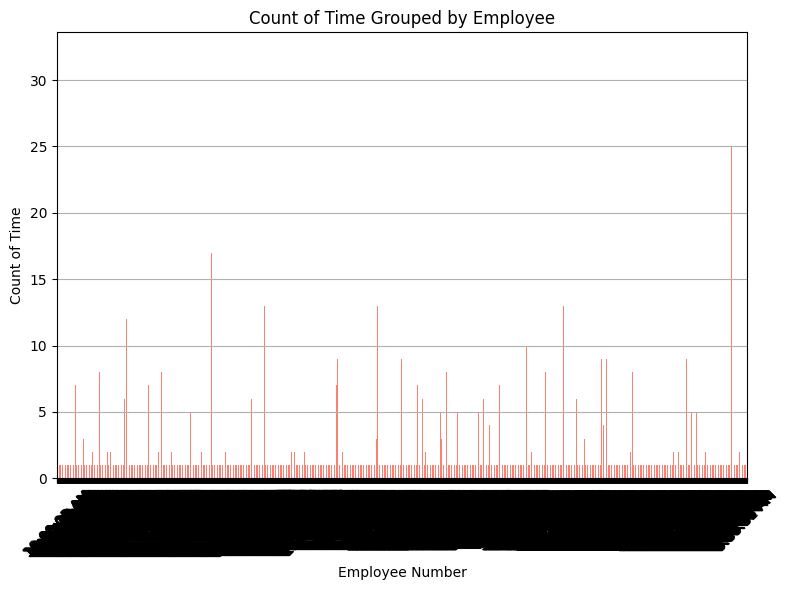

In [84]:
# Grouping time by employee number
grouped_by_employee = df.groupby('Tijd')['Werknemer nr.'].count()

# Plotting
plt.figure(figsize=(8, 6))
grouped_by_employee.plot(kind='bar', color='salmon')
plt.title('Count of Time Grouped by Employee')
plt.xlabel('Employee Number')
plt.ylabel('Count of Time')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The graph above is unreadable and not at all useable. This can be ficked by grouping the the data. Instead of using direct times, it may be better to see if time has any influence if we put them in categories. This is because the time noted in the dataset isnt the time of the picking but the time they were scanned. Because the picked blackberries are always scanned in the same timeslot as they were picked i will use the following categories: Before first break (0), After first break(1), After second break(2), after third break(3).

In [85]:
# Convert 'Tijd' column to a datetime object
df['Tijd'] = pd.to_datetime(df['Tijd'])

# Define time boundaries for the breaks
first_break_start = pd.to_datetime('10:00:00 AM')
first_break_end = pd.to_datetime('10:15:00 AM')
second_break_start = pd.to_datetime('12:00:00 PM')
second_break_end = pd.to_datetime('12:30:00 PM')
third_break_start = pd.to_datetime('3:00:00 PM')
third_break_end = pd.to_datetime('3:15:00 PM')

# Create a function to categorize times with numbers
def categorize_time(row):
    if row['Tijd'] < first_break_start:
        return 0
    elif first_break_end < row['Tijd'] < second_break_start:
        return 1
    elif second_break_end < row['Tijd'] < third_break_start:
        return 2
    else:
        return 3

# Apply the categorize_time function to create a new 'Time_Category' column
df['Tijd'] = df.apply(categorize_time, axis=1)

# Display the updated DataFrame
print(df)

          Datum  Tijd  Werknemer nr.                            Locatie  \
0      8/1/2023     0             25  09 - Buitenteelt Naast kas Afd. 9   
1      8/1/2023     0             25  09 - Buitenteelt Naast kas Afd. 9   
2      8/1/2023     0             45  09 - Buitenteelt Naast kas Afd. 9   
3      8/1/2023     0             75  09 - Buitenteelt Naast kas Afd. 9   
4      8/1/2023     0             75  09 - Buitenteelt Naast kas Afd. 9   
...         ...   ...            ...                                ...   
6061  8/31/2023     1             54  09 - Buitenteelt Naast kas Afd. 9   
6062  8/31/2023     1             87  09 - Buitenteelt Naast kas Afd. 9   
6063  8/31/2023     1             44  09 - Buitenteelt Naast kas Afd. 9   
6064  8/31/2023     1             44  09 - Buitenteelt Naast kas Afd. 9   
6065  8/31/2023     1             44  09 - Buitenteelt Naast kas Afd. 9   

                Fust  Aantal fusten  Eenheden   Kwaliteit  Tarief per eenheid  \
0     AH  4 x CBL-

C:\Users\lolyp\AppData\Local\Temp\ipykernel_20960\1536923135.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Tijd'] = pd.to_datetime(df['Tijd'])


As you can see below the data is allot more readable. The count of employee is quite high, this is because the same employee cna be counted multiple times. This is because the employee can pick multiple times in a day. The most common time to pick is before the first break. 

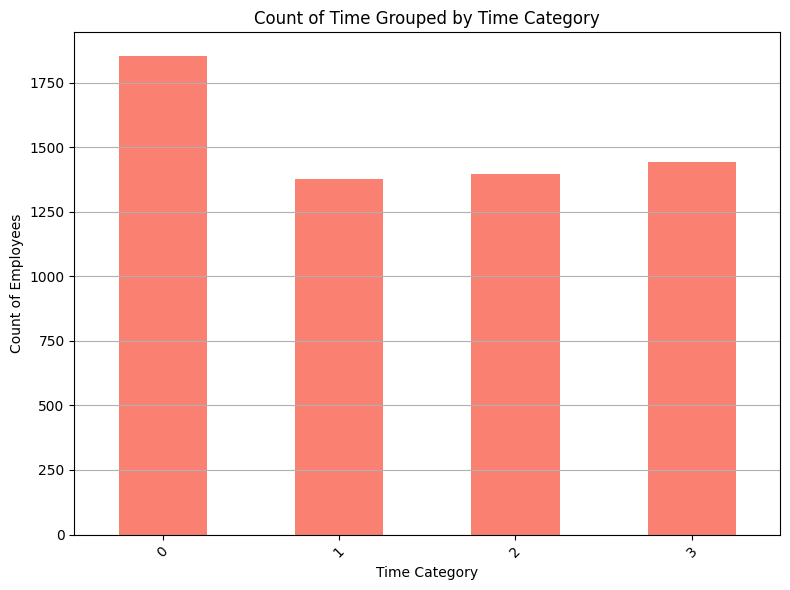

In [86]:
# Grouping time by Worker count
grouped_by_time_category = df.groupby('Tijd')['Werknemer nr.'].count()

# Plotting with labels for legend
plt.figure(figsize=(8, 6))
grouped_by_time_category.plot(kind='bar', color='salmon', label='Time Category')  # Assigning label for legend
plt.title('Count of Time Grouped by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## Data preparation

First we want to check for missing data. I do that by vizualizing the data in a graph and there you can see the only missing data is in the `Tarief per eenheid column`. Because there is so much of this data missing and there is no direct need for it, i have decided to drop this column. 

<Axes: >

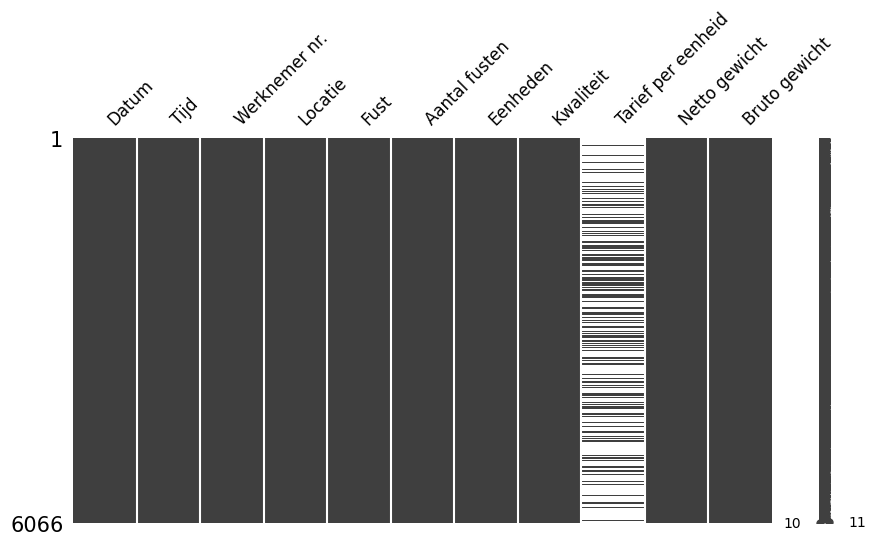

In [87]:
# Assuming 'df' is your DataFrame
msno.matrix(df, figsize=(10, 5), fontsize=12)

In [88]:
missing_values = df.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Tarief per eenheid    4115
dtype: int64


In [89]:
# Dropped this table because it was incomplete and not neccesary.
df = df.drop('Tarief per eenheid', axis=1)

In [90]:
# Check if 'aantal fusten' column exists in the DataFrame
if 'Aantal fusten' in df.columns:
    # Get the counts of unique values in the 'aantal fusten' column
    unique_counts = df['Aantal fusten'].value_counts()
    
    # Display unique values and their counts
    print("Unique values and their counts in 'aantal fusten':")
    print(unique_counts)
else:
    print("'aantal fusten' column not found in the DataFrame.")


Unique values and their counts in 'aantal fusten':
Aantal fusten
1    6066
Name: count, dtype: int64


Because all the data in `Aantal fusten`(Fust amount) is the same, i have decided to drop this column aswell. Because it is all 1 it doesnt give us any usefull information.

In [91]:
# Dropped this table because it was incomplete and not neccesary.
df = df.drop('Aantal fusten', axis=1)

### Scaling & Normalization
Because i use mostly categorical data, it might not be the best choice to scale or normalize the data. Maybe if i am going to use a distance-based algorithms like K-Nearest Neighbors iit might take effect, but then i will do it at the time of the algorithm instead of here.

# Phase 3
## Preprocessing

Because dataset has allot of categorical values in it, i will try to convert them to numerical values. This way i can put them in a heatplot and see if there is a correlation between the different features.
First i will start with the Location. I will keep the designated numeric value of each location to keep it simple.

In [92]:
df["Locatie"] = df["Locatie"].map({"01 - Kas Afd. 1":1, "02 - Kas Afd. 2 ":2, "08 - Buitenteelt achter kas Afd. 8":8, "09 - Buitenteelt Naast kas Afd. 9":9}).astype(int)

Next are the Fusts. These are the sizes of the crates and are also categorical values. I will convert them to numeric values as well.

In [93]:
df["Fust"] = df["Fust"].map({"AH  1 x CBL-8 ":1, "AH  4 x CBL-8 ":2, "Klasse 2   ( 12 x 150 gr )":3}).astype(int)

Quality also is a categorical value. I will convert them to numeric values as well. 5 for the highest possible quality and 1 for the lowest possible quality.

In [94]:
df["Kwaliteit"] = df["Kwaliteit"].map({"Uitstekend":5, "Goed":4, "Gemiddeld":3, "Matig":2}).astype(int)

In [95]:
df["Datum"] = pd.to_datetime(df["Datum"])

In [96]:
df.sample(5)

,Datum,Tijd,Werknemer nr.,Locatie,Fust,Eenheden,Kwaliteit,Netto gewicht,Bruto gewicht
3765,2023-08-15,3,21,9,2,3.50,5,3.50,6.02
1166,2023-08-04,3,83,9,2,2.85,5,2.85,5.37
3677,2023-08-15,1,42,9,2,2.44,5,2.44,4.96
5733,2023-08-29,0,64,2,2,2.33,5,2.33,4.85
5263,2023-08-24,2,4,2,2,2.31,5,2.31,4.83


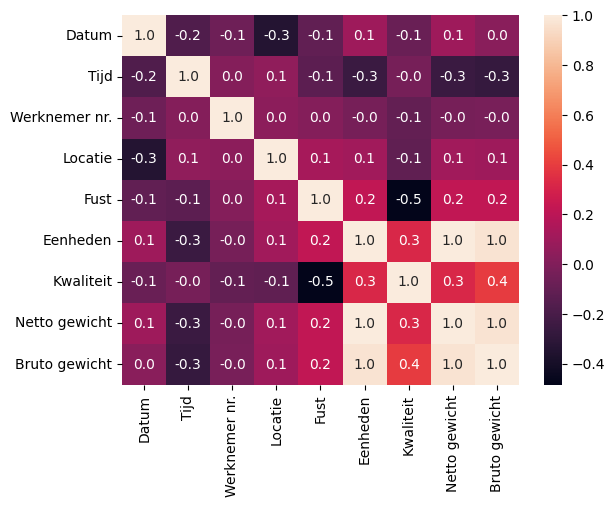

In [97]:
correlations = df.corr()
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

### 💡 Feature selection

In [98]:

features_quality = ["Locatie", "Tijd", "Werknemer nr.", "Fust"]
target_quality = "Kwaliteit"

features_weigth = ["Werknemer nr.", "Fust", "Tijd", "Locatie"]
target_weight = "Netto gewicht"

X_quality = df[features_quality]
y_quality = df[target_quality]

X_weigth = df[features_weigth]
y_weigth = df[target_weight]

For Quality I chose for the Location, Time, Worker number and Fust. I went for these features even though Fust is the only one that shows any correlation with quality. I went for this because i used to work at the company I got the data from and know that these features have no effect the quality. 

Every Location grows the blackberries differently so they can test which gives the best quality and which one gives the most blackberries. The time matters allot for the attention of the person. Some people have more attention in the morning and some more in the evening. Also, the weather could have a big impact and if it is a hot day and they are too long in the hot temperature it can damage the blackberry and bring down the quality. Each person picks the blackberries in their own way. Some are more careful than others which is why worker number is in there too.

### 🪓 Splitting into train/test

In [99]:
from sklearn.model_selection import train_test_split
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, y_quality, test_size=.2)
print("There are in total", len(X_quality), "observations, of which", len(X_train_quality), "are now in the train set, and", len(X_test_quality), "in the test set. These are for the quality target")

from sklearn.model_selection import train_test_split
X_train_weigth, X_test_weigth, y_train_weigth, y_test_weigth = train_test_split(X_weigth, y_weigth, test_size=.2)
print("There are in total", len(X_weigth), "observations, of which", len(X_train_weigth), "are now in the train set, and", len(X_test_weigth), "in the test set. These are for the weight target")

There are in total 6066 observations, of which 4852 are now in the train set, and 1214 in the test set. These are for the quality target
There are in total 6066 observations, of which 4852 are now in the train set, and 1214 in the test set. These are for the weight target


## Modelling
### Baseline model
To get a baseline model i will use a simple nearest neighbour model. This way i can see if the model is better than the baseline model.

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and fit the KNeighborsClassifier model
model = KNeighborsClassifier()
model.fit(X_train_quality, y_train_quality)

# Make predictions
pred = model.predict(X_test_quality)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_quality, pred)
print("Accuracy:", accuracy)

# Calculate and print other evaluation metrics with 'macro' averaging
precision = precision_score(y_test_quality, pred, average='macro')
recall = recall_score(y_test_quality, pred, average='macro')
f1 = f1_score(y_test_quality, pred, average='macro')
conf_matrix = confusion_matrix(y_test_quality, pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7775947281713345
Precision: 0.6926568664092022
Recall: 0.6024708073644244
F1 Score: 0.627392924329039
Confusion Matrix:
 [[ 67   3  24]
 [  4  35 181]
 [  4  54 842]]


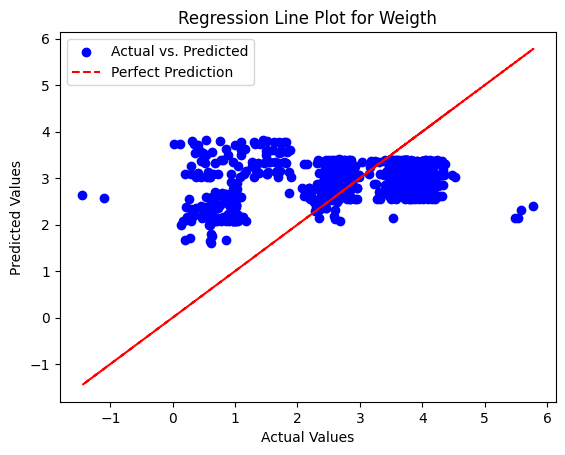

In [101]:
from sklearn.linear_model import LinearRegression

# Fit a Linear Regression model to your training data
model_weigth = LinearRegression()
model_weigth.fit(X_train_weigth, y_train_weigth)

# Make predictions on the test data
pred_weigth = model_weigth.predict(X_test_weigth)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test_weigth, pred_weigth, label="Actual vs. Predicted", color="blue")

# Add a regression line to the plot
plt.plot(y_test_weigth, y_test_weigth, linestyle="--", color="red", label="Perfect Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line Plot for Weigth")
plt.legend()
plt.show()

### Decision Tree
To know how deep i should let the Tree go i made a line plot. Because the acuracy is always so high, for this project it doesnt matter to much. As you can see below the accuracy for these 200 depths is between 80% and 82%. Every time the notebook is run the best depth changes but the one that is either in the middle or high is 6 so thats why i chose for it to be 6. 

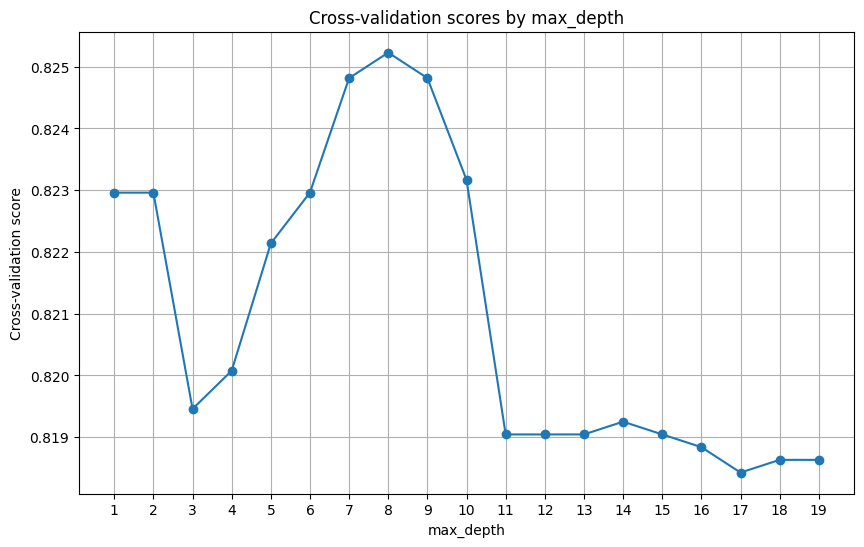

In [102]:


# Define a range of max_depth values to explore
max_depth_values = range(1, 20)

# Initialize an empty list to store cross-validation scores
cross_val_scores = []

# Perform cross-validation for each max_depth value
for max_depth in max_depth_values:
    # Create Decision Tree Classifier
    tree_model = DecisionTreeClassifier(max_depth=max_depth)
    
    # Calculate cross-validation score (using, for example, accuracy as a metric)
    scores = cross_val_score(tree_model, X_train_quality, y_train_quality, cv=3, scoring='accuracy') 
    cross_val_scores.append(np.mean(scores))

# Plotting cross-validation scores against max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cross_val_scores, marker='o', linestyle='-')
plt.title('Cross-validation scores by max_depth')
plt.xlabel('max_depth')
plt.ylabel('Cross-validation score')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()


To check how well the Decision Tree is doing i want to see how each fold does. Below you can see that every fold is about as acurate as the other.

In [103]:
# Create StratifiedKFold with 6 splits
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Create Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=6)  # Set your desired max_depth

# Perform cross-validation using StratifiedKFold
cv_scores = cross_val_score(tree_model, X_quality, y_quality, cv=skf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.81998022 0.81998022 0.82591494 0.8140455  0.82294758 0.8189911 ]
Mean cross-validation score: 0.8203099241674909


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(


In [104]:
max_depth_limit = 6  # Set your desired maximum depth

# Create a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=max_depth_limit)

# Fit the model to the training data
tree_model.fit(X_train_quality, y_train_quality)

# Make predictions on the test data
tree_pred = tree_model.predict(X_test_quality)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test_quality, tree_pred)
precision = precision_score(y_test_quality, tree_pred, average='macro')
recall = recall_score(y_test_quality, tree_pred, average='macro')
f1 = f1_score(y_test_quality, tree_pred, average='macro')

print(f"Decision Tree Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Decision Tree Model Accuracy: 0.8113673805601318
Precision: 0.7482690108526201
Recall: 0.6576473959452683
F1 Score: 0.6549046245073799


In [105]:
# Generate the classification report with zero_division parameter
report = classification_report(y_test_quality, tree_pred, zero_division=1)

# Print the classification report
print("F1 Report:\n", report)

F1 Report:
               precision    recall  f1-score   support

           3       0.94      0.90      0.92        94
           4       0.49      0.09      0.15       220
           5       0.81      0.98      0.89       900

    accuracy                           0.81      1214
   macro avg       0.75      0.66      0.65      1214
weighted avg       0.76      0.81      0.76      1214



In [106]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_quality, tree_pred)

# Calculate accuracy for each quality class
unique_classes = set(y_test_quality)  # Get unique quality classes

for quality_class in unique_classes:
    # Find the index corresponding to the quality class
    class_index = list(unique_classes).index(quality_class)
    
    # Calculate true positives for the class
    true_positives = conf_matrix[class_index, class_index]
    
    # Calculate instances of the class in the test set
    class_instances = sum(conf_matrix[class_index, :])
    
    # Calculate accuracy for the class
    class_accuracy = true_positives / class_instances
    
    print(f"Accuracy for quality '{quality_class}': {class_accuracy:.4f}")

Accuracy for quality '3': 0.9043
Accuracy for quality '4': 0.0909
Accuracy for quality '5': 0.9778


Here i visualize my descision tree.

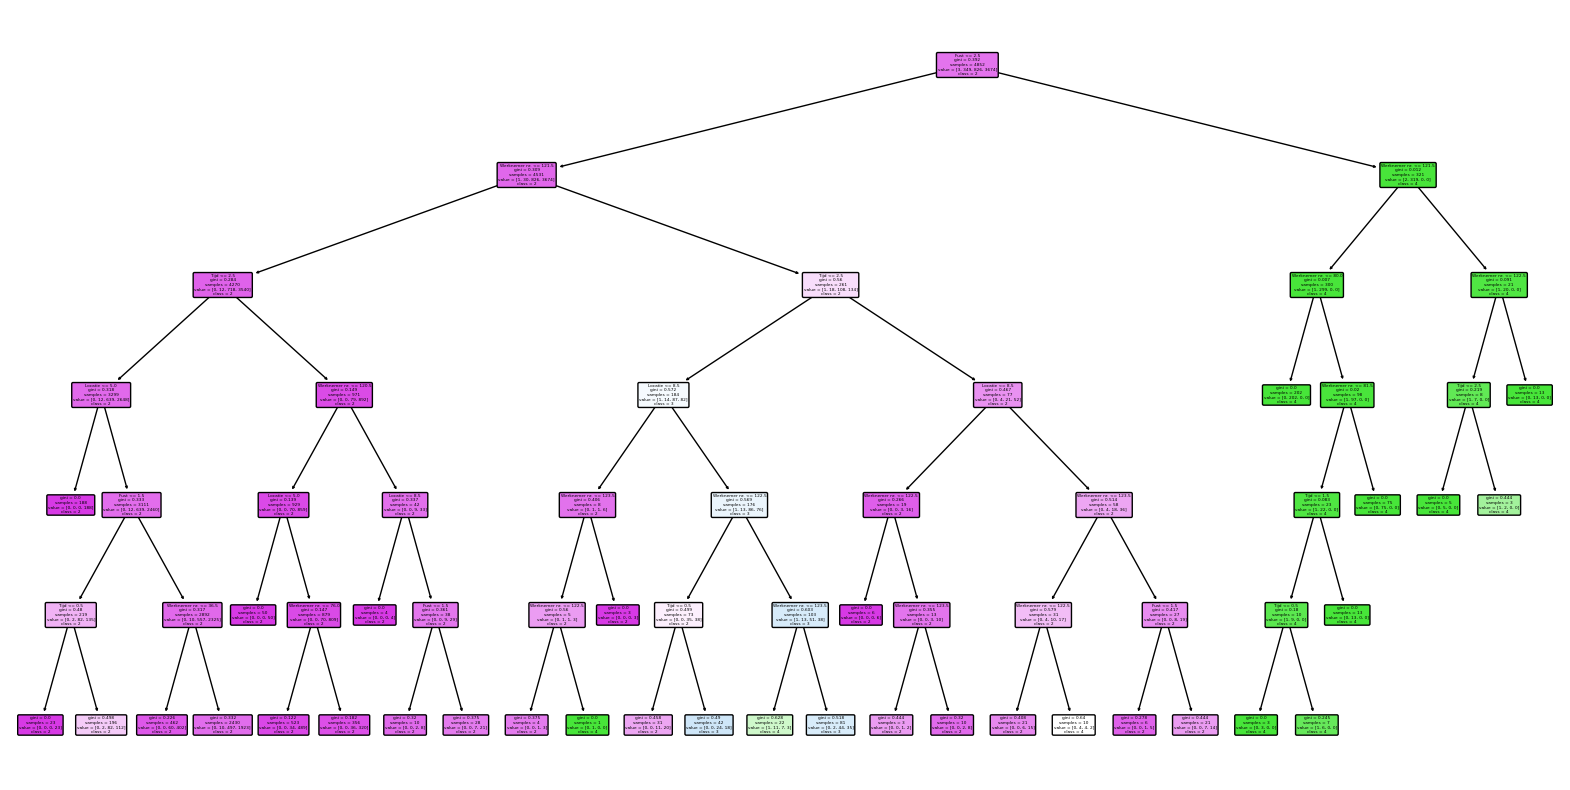

In [107]:
feature_names = features_quality  
class_names = df["Kwaliteit"].unique().tolist()
class_names_str = [str(class_name) for class_name in class_names]


# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=class_names_str, rounded=True)
plt.savefig('decision_tree.png', format='png', bbox_inches='tight', dpi=750) # Save the decision tree as an image
plt.show()

### Clustering

c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

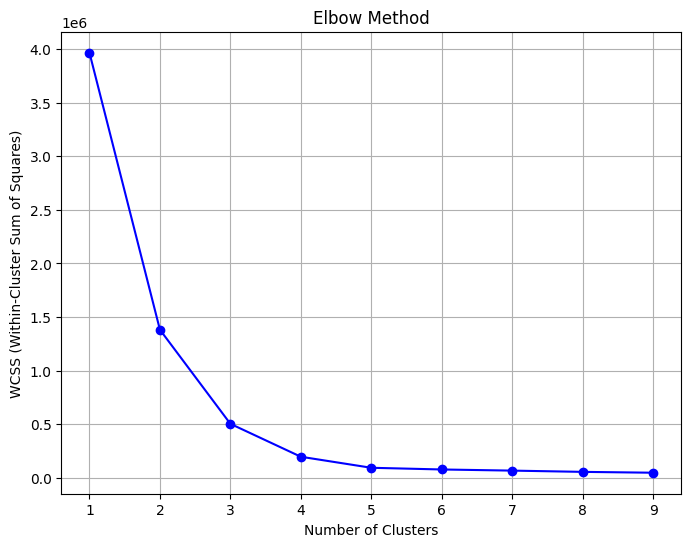

In [108]:
wcss = []
for i in range(1, 10):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_quality)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

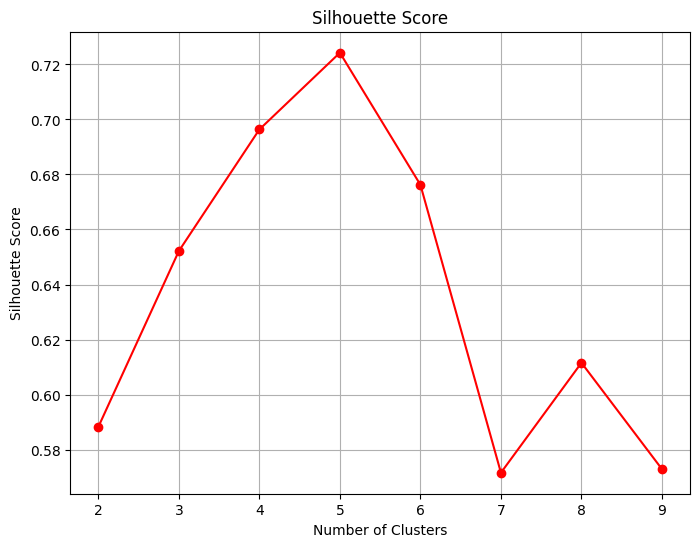

In [109]:
sil_scores = []
for i in range(2, 10):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_quality)
    silhouette_avg = silhouette_score(X_train_quality, cluster_labels)
    sil_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), sil_scores, marker='o', linestyle='-', color='r')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

To find the number of clusters i used the elbow method and the silhouette method. They both vary allot each time they are run, but on average 4 is the best number of clusters. This is why i chose 4 clusters.

In [110]:
# Set the number of clusters (you may adjust this based on your data)
num_clusters = 4

# Create a KMeans model with n_init explicitly set
kmeans_model = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train_quality)

# Predict cluster labels for the data
cluster_labels = kmeans_model.predict(X_train_quality)

# Evaluate clustering performance (Silhouette Score)
silhouette_avg = silhouette_score(X_train_quality, cluster_labels)
print(f"Silhouette Score for KMeans clustering: {silhouette_avg}")

Silhouette Score for KMeans clustering: 0.6963608911272712


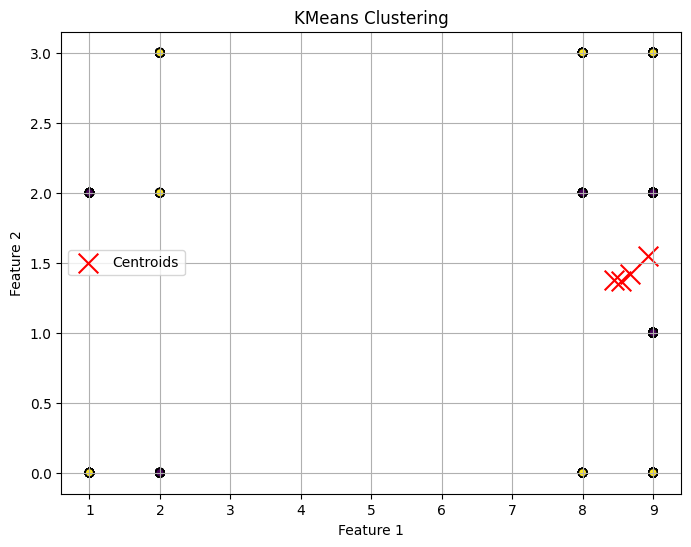

In [111]:
X_train_quality_columns = X_train_quality.iloc[:, [0, 1]].values

plt.figure(figsize=(8, 6))

# Plotting points with colors representing their cluster assignments
plt.scatter(X_train_quality_columns[:, 0], X_train_quality_columns[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='black')

# Adding centroids for each cluster
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=200, c='red', marker='x', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### Random Forrest

In [112]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform Grid Search for 'n_estimators'
param_grid_n_estimators = {'n_estimators': list(range(1, 500))}
grid_search_n_estimators = GridSearchCV(estimator=rf, param_grid=param_grid_n_estimators, cv=5, scoring='accuracy')
grid_search_n_estimators.fit(X_quality, y_quality)
best_n_estimators = grid_search_n_estimators.best_params_['n_estimators']
best_score_n_estimators = grid_search_n_estimators.best_score_
print("Best n_estimators:", best_n_estimators, "Score:", best_score_n_estimators)

# Perform Grid Search for 'random_state'
param_grid_random_state = {'random_state': list(range(1, 250))}
grid_search_random_state = GridSearchCV(estimator=rf, param_grid=param_grid_random_state, cv=5, scoring='accuracy')
grid_search_random_state.fit(X_quality, y_quality)
best_random_state = grid_search_random_state.best_params_['random_state']
best_score_random_state = grid_search_random_state.best_score_
print("Best random_state:", best_random_state, "Score:", best_score_random_state)

# Perform Grid Search for 'min_samples_leaf'
param_grid_min_samples_leaf = {'min_samples_leaf': list(range(1, 50))}
grid_search_min_samples_leaf = GridSearchCV(estimator=rf, param_grid=param_grid_min_samples_leaf, cv=5, scoring='accuracy')
grid_search_min_samples_leaf.fit(X_quality, y_quality)
best_min_samples_leaf = grid_search_min_samples_leaf.best_params_['min_samples_leaf']
best_score_min_samples_leaf = grid_search_min_samples_leaf.best_score_
print("Best min_samples_leaf:", best_min_samples_leaf, "Score:", best_score_min_samples_leaf)

# Perform Grid Search for 'min_samples_split'
param_grid_min_samples_split = {'min_samples_split': list(range(1, 50))}
grid_search_min_samples_split = GridSearchCV(estimator=rf, param_grid=param_grid_min_samples_split, cv=5, scoring='accuracy')
grid_search_min_samples_split.fit(X_quality, y_quality)
best_min_samples_split = grid_search_min_samples_split.best_params_['min_samples_split']
best_score_min_samples_split = grid_search_min_samples_split.best_score_
print("Best min_samples_split:", best_min_samples_split, "Score:", best_score_min_samples_split)

# Perform Grid Search for 'max_features'
param_grid_max_features = {'max_features': ['sqrt', 'log2', None]}
grid_search_max_features = GridSearchCV(estimator=rf, param_grid=param_grid_max_features, cv=5, scoring='accuracy')
grid_search_max_features.fit(X_quality, y_quality)
best_max_features = grid_search_max_features.best_params_['max_features']
best_score_max_features = grid_search_max_features.best_score_
print("Best max_features:", best_max_features, "Score:", best_score_max_features)

# Perform Grid Search for 'max_depth'
param_grid_max_depth = {'max_depth': [None] + list(range(1, 50))}
grid_search_max_depth = GridSearchCV(estimator=rf, param_grid=param_grid_max_depth, cv=5, scoring='accuracy')
grid_search_max_depth.fit(X_quality, y_quality)
best_max_depth = grid_search_max_depth.best_params_['max_depth']
best_score_max_depth = grid_search_max_depth.best_score_
print("Best max_depth:", best_max_depth, "Score:", best_score_max_depth)


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best n_estimators: 3 Score: 0.7764555046849683


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best random_state: 99 Score: 0.7705248332520702


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best min_samples_leaf: 24 Score: 0.8104168053120301


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 245.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lolyp\AppD

Best min_samples_split: 44 Score: 0.7911271494558537


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best max_features: log2 Score: 0.7678867458654255


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best max_depth: 1 Score: 0.8203096330119479


Accuracy of the Random Forest model: 0.8097
Precision: 0.5985853227232537
Recall: 0.6276595744680851
F1 Score: 0.608038677337428


c:\Users\lolyp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


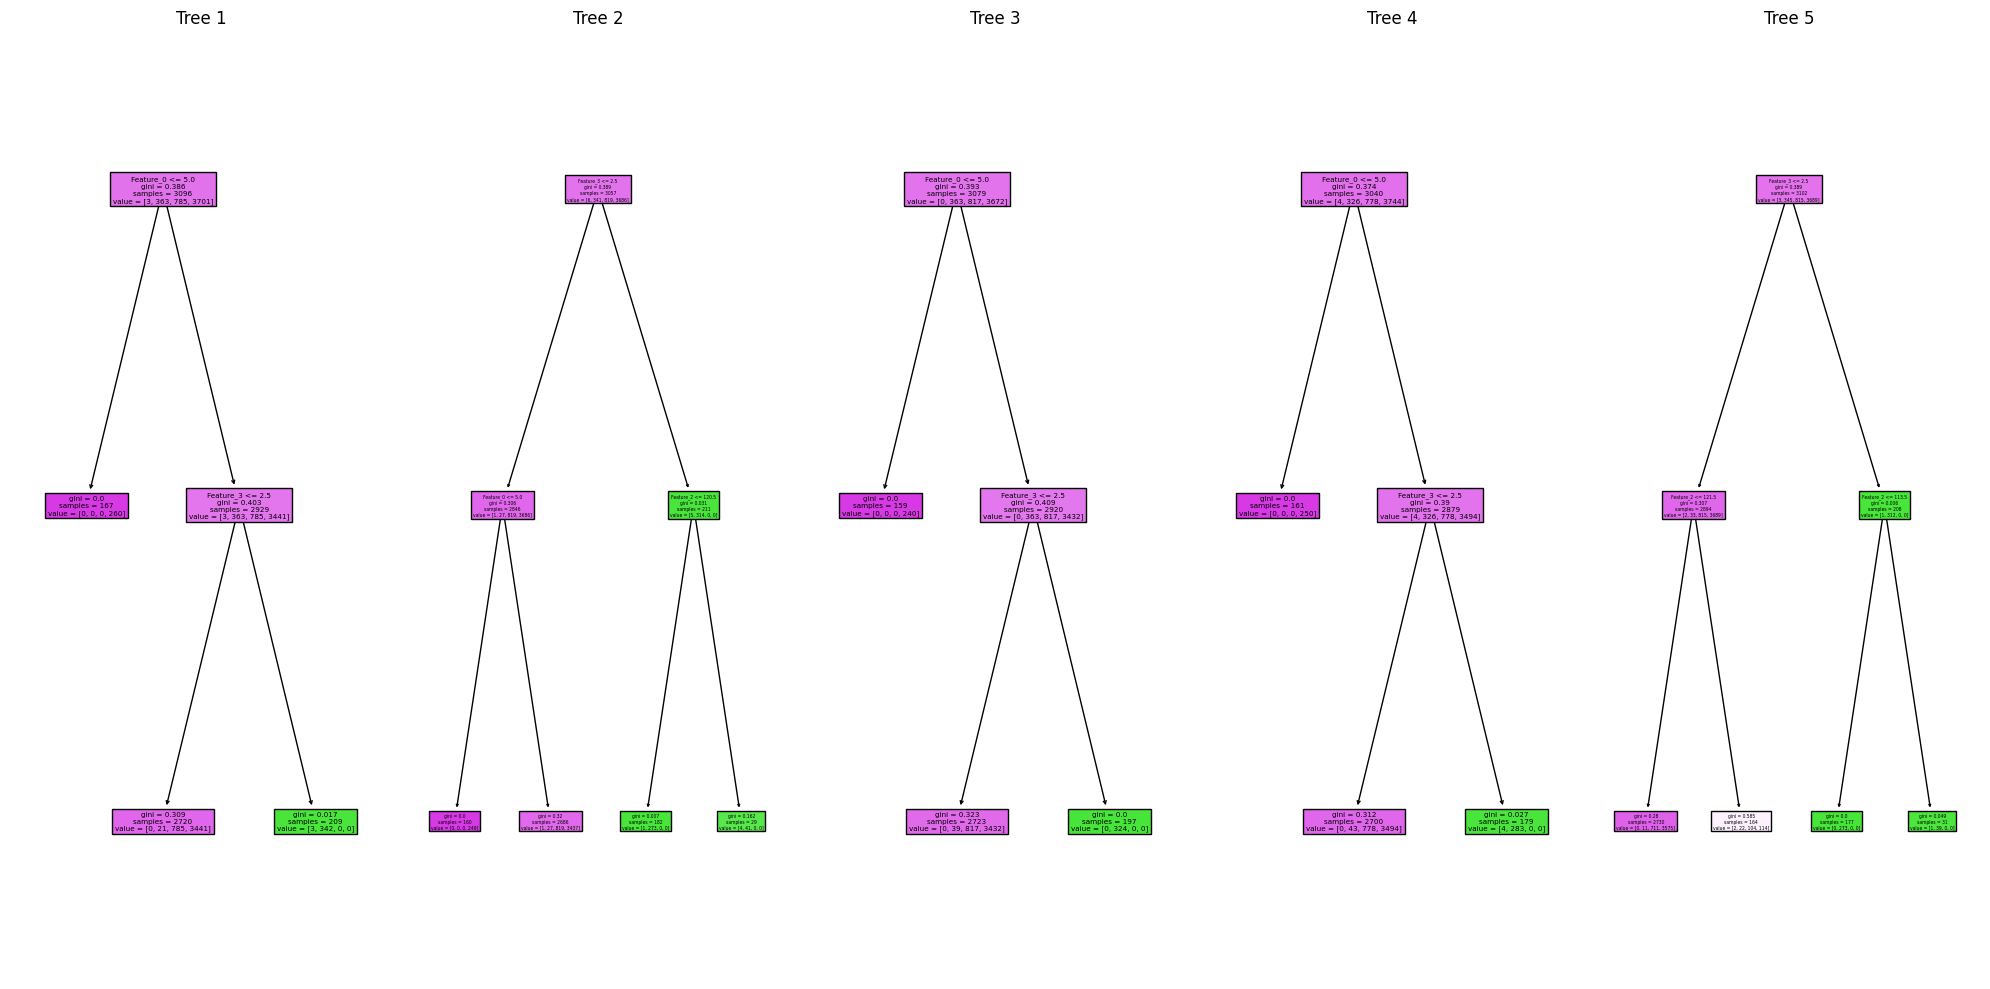

In [113]:
# Creating a Random Forest classifier
forest = RandomForestClassifier(n_estimators=14, random_state=99, min_samples_leaf=27, min_samples_split=49, max_features='log2', max_depth=2)

# Fitting the model on the training data
forest.fit(X_train_quality, y_train_quality)

# Making predictions on the test data
y_pred = forest.predict(X_test_quality)

# Calculating and printing the accuracy
accuracy = accuracy_score(y_test_quality, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_quality, y_pred, average='macro')
recall = recall_score(y_test_quality, y_pred, average='macro')
f1 = f1_score(y_test_quality, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plotting individual trees within the Random Forest
plt.figure(figsize=(20, 10))

# Choose the number of trees to visualize (e.g., first 5 trees)
num_trees_to_plot = 5
for i in range(num_trees_to_plot):
    plt.subplot(1, num_trees_to_plot, i + 1)
    tree.plot_tree(forest.estimators_[i], filled=True, feature_names=[f"Feature_{i}" for i in range(X_quality.shape[1])])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()


# Phase 4

In this phase, the model is saved using the `joblib.dump()` function to preserve its current state. 

In [114]:
joblib.dump(forest, 'forest_model.joblib')

['forest_model.joblib']

For the detailed feedback received on the project, including stakeholder input and further analysis, please refer to the dedicated document titled Delivery. The detailed insights and conclusions from the project stakeholders are documented in that separate file.